In [1]:
import numpy as np
import torch
from torch import nn
import torchvision
from torchvision import transforms
import moviepy.editor as mvp

from utils import VideoWriter, imshow, get_coords
from data_loader import MNIST
from models import Siren

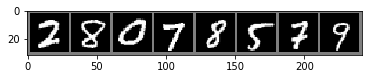

2, 8, 0, 7, 8, 5, 7, 9


In [2]:
data = MNIST(batch_size=8)
data_iter = iter(data.train_loader)
images, labels = data_iter.next()

imshow(torchvision.utils.make_grid(images))
print(', '.join(map(str, labels.numpy())))

coords = get_coords(28)
target = images[0].reshape(-1, 1)
coords, target = coords.cuda(), target.cuda()

In [3]:
net = Siren(in_features=2, out_features=1, hidden_features=128, hidden_layers=2)
net.cuda()

loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=1e-4)

In [4]:
resize = transforms.Resize(256, interpolation=0)
num_iters = 200
frame_every = 2
print_every = 50
running_loss = 0

with VideoWriter('output/train.mp4') as vid:
    for i in range(num_iters):
        optimizer.zero_grad()
        y = net(coords)
        loss = loss_fn(y, target)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if (i + 1) % frame_every == 0:
            vid.add(resize(y.detach().reshape(1, 28, 28)).cpu())
        if (i + 1) % print_every == 0:
            print(f'[{i + 1} / {num_iters}] loss: {running_loss / print_every}')
            running_loss = 0

print('Finished')
mvp.ipython_display('output/train.mp4', loop=True)

[50 / 200] loss: 0.40568359941244125
[100 / 200] loss: 0.0577661519497633
[150 / 200] loss: 0.021769528575241566
[200 / 200] loss: 0.012661735229194164
Finished


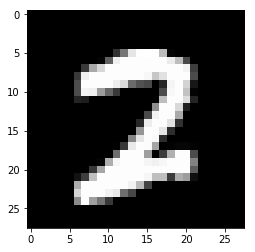

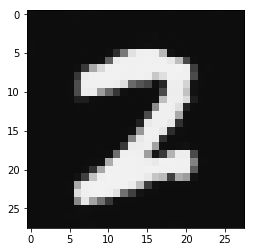

In [5]:
with torch.no_grad():
    imshow(target.reshape(1, 28, 28).cpu())
    imshow(net(coords).reshape(1, 28, 28).cpu())